<a href="https://colab.research.google.com/github/kurealnum/dsrp-2025/blob/main/DSRP_Day_7_Lab_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 7: Linear Regression**
---

### **Description**
In this lab, you will learn how to build linear regression models using sklearn.

</br>

### **Lab Structure**
**Part 1**: [California Housing Dataset](#p1)

**Part 2**: [Diabetes Dataset](#p2)

**Part 3**: [Model Evaluation](#p3)

**Part 4**: [A Deeper Look at Inference](#p4)

</br>

### **Learning Objectives**
 By the end of this lab, you will:
1. Recognize what sklearn is and why we're using it.
2. Recognize how to implement Linear Regression models with sklearn.
3. Recognize how to evaluate Linear Regression models in sklearn.


</br>

### **Cheat Sheets**
* [Data Wranging](https://docs.google.com/document/d/1rQaux3Ccj7x-cDdIGfd56BszSkqQpbZ3EonMFbJxfxI/edit?usp=drive_link)

* [Linear Regression with sklearn](https://docs.google.com/document/d/10ON1Vt_Ll3Bduu12r8g52VZzsMFt21lga_6zTvYDPVc/edit?usp=sharing)

<br>

**Run the cell below to import the necessary libraries and functions.**

In [3]:
# @title
!pip install pandas
import pandas as pd

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install scikit-learn
from sklearn import datasets, model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

<a name="p1"></a>

---
## **Part 1: California Housing Dataset**
---

#### **About the Dataset**
The price of a home in California is nearly double the national average. The California Housing Dataset is a collection of data containing information on the median house value and other features of census block groups in California. This dataset was derived from the 1990 U.S. Census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The features are as follows:
* `MedInc`: median income in block group (in hundreds of thousands of dollars, i.e. \$100,000)
* `HouseAge`: median house age in block group
* `AveRooms`: average number of rooms per household
* `AveBedrms`: average number of bedrooms per household
* `Population`: block group population
* `AveOccup`: average number of household members
* `Latitude`: block group latitude
* `Longtitude`: block group longitude
* `TARGET`: median house value for California districts (in hundreds of thousands of dollars, i.e. $100,000)

#### **Your Task**
Using the California Housing dataset, you will be able to predict the median house value for a specific home.

As you build your model, try using different features for your model and see how the accuracy changes.


#### **Step #1: Load the data**

Load the `California Housing Dataset` from the sklearn library. Then, create the DataFrame, defining your features and your target.

**HINT:** This [documentation](https://scikit-learn.org/1.5/datasets/real_world.html#california-housing-dataset) may be helpful.

In [37]:
from sklearn.datasets import fetch_california_housing

cali_data = fetch_california_housing()
df = pd.DataFrame(data=cali_data.data, columns=cali_data.feature_names)
df['TARGET'] = cali_data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### **Step #2: Decide independent and dependent variables**

Let's choose the following features:
* `HouseAge`
* `AveBedrms`
* `Latitude`
* `Longitude`

<br>

And the following label: `TARGET`.

In [7]:
features = df[["HouseAge","AveBedrms", "Latitude", "Longitude"]]

In [8]:
label = df[["TARGET"]]

#### **Step #3: Split data into training and testing data**

Let's make sure the test set is 20% of the total dataset.

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

#### **Step #4: Import your model**

In [12]:
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize your model and set hyperparameters**


Linear regression takes no hyperparameters, so just initialize the model.

In [13]:
reg = LinearRegression()

#### **Step #6: Fit your model, test on the testing data, and create a visualization if applicable**

In [24]:
pred = reg.predict(X_test)

##### **Create a visualization**

Use `y_test` and your `pred` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be. The code has already been given to you.

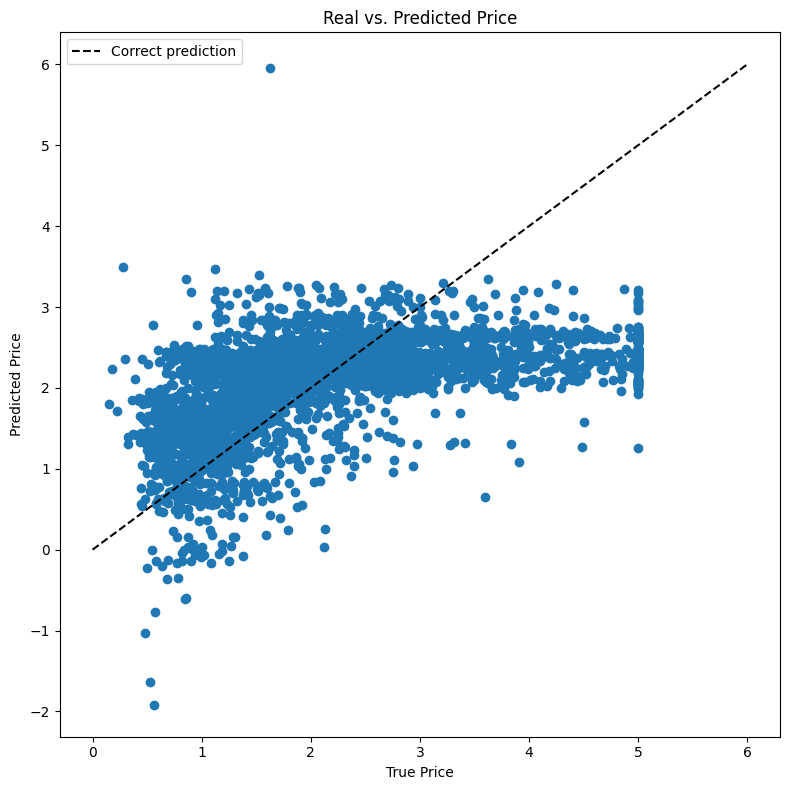

In [25]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, pred)
plt.plot([0, 6], [0, 6], '--k', label="Correct prediction")


plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title("Real vs. Predicted Price")

plt.axis('tight')
plt.legend()
plt.tight_layout()

#### **Step #7: Evaluate your model**

Use mean squared error and the R2 score as the evaluation metrics.


In [28]:
print('mean squared: ', mean_squared_error(y_test, pred))

print('r squared: ', r2_score(y_test, pred))

mean squared:  0.9767500966834037
r squared:  0.25462194406314387


#### **Step #8: Use the model**

Use the model to predict the median house value for a home that is 51 years old, has an average of 7.2 bedrooms, and is at 38.1 latitude and -121.08 longitude.

<br>

**NOTE**: The predictions are in units of $100,000.

In [44]:
prediction = reg.predict(pd.DataFrame([[51, 7.2, 38.1, -121.08]],
                         columns=['HouseAge',	'AveBedrms','Latitude',	'Longitude']))

prediction

array([[2.4533353]])

<a name="p2"></a>

---
## **Part 2: Diabetes Dataset**
---
#### **About the Dataset**
Diabetes is the 8th leading cause of death in the United States. More than 37 milion people in the U.S. have diabetes, and one in 5 of these individuals do not know it. This dataset contains data from diabetic patients with features such as their BMI, age, blood pressure, and glucose levels, which are useful in predicting the diabetes disease progression in patients. We will be looking at these variables to help predict disease progression in diabetic patients.

The features are as follows:
* `AGE`: age (in years)
* `SEX`: sex of the patient
* `BMI`: body mass index
* `BP`: average blood pressure
* `S1`: tc, total serum cholesterol
* `S2`: ldl, low-density lipoproteins
* `S3`: hdl, high-density lipoproteins
* `S4`: tch, total cholesterol / HDL
* `S5`: ltg, possibly log of serum triglycerides level
* `S6`: glu, blood sugar level
* `Y`: quantitative measure of disease progression one year after baseline

**NOTE**: The units for each of these variables are not entirely clear, so focus instead on the ability for your model to produce good or correct predictions rather than what the specific values mean.

<br>

#### **Your Task**
Using the Diabetes dataset, you will do the following:
* Build a model that will predict disease progression in diabetic patients;
* Predict the disease progression of a patient with various ages, BMIs, and blood pressures.

#### **Step #1: Load the data**

In [61]:
file = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"

df = pd.read_csv(file, sep='\t')
df.head(18)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


#### **Step #2: Decide independent and dependent variables**

Here we would like to use the `AGE` `BMI` and `BP` columns as our independent variables and `Y` as our dependent variable.

We are building a predictor of disease progression, `Y`.


In [34]:
features = df[["AGE", "BMI", "BP"]]

In [35]:
label = df["Y"]

#### **Step #3: Split data into training and testing data**

Use `AGE`, `BMI`, and `BP` for our independent variables.

In [46]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

#### **Step #4: Import your model**

In [47]:
# Already imported

#### **Step #5: Initialize your model and set hyperparameters**


Linear regression takes no hyperparameters, so just initialize the model.

In [50]:
reg = LinearRegression()

#### **Step #6: Fit your model, test on the testing data, and create a visualization if applicable**

In [53]:
reg.fit(X_test, y_test)
pred = reg.predict(X_test)

##### **Create a visualization**

Use `y_test` and your `prediction` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be. The code has already been given to you.
```
plt.plot([0, 300], [0, 300], '--k', label="Correct prediction")
```

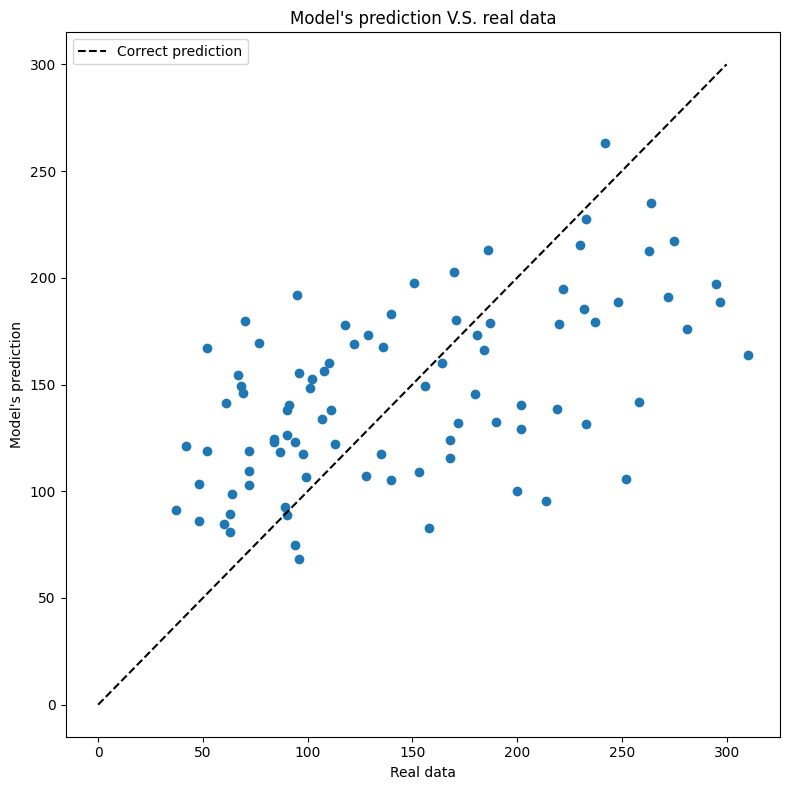

In [58]:
plt.figure(figsize=(8, 8))



plt.scatter(y_test, pred)
plt.plot([0, 300], [0, 300], '--k', label="Correct prediction")


plt.axis('tight')

plt.xlabel("Real data")
plt.ylabel("Model's prediction")
plt.title("Model's prediction V.S. real data")


plt.legend()
plt.tight_layout()

#### **Step #7: Evaluate your model**

Use mean squared error and the R2 score as the evaluation metrics.


In [60]:
mean_squared_error(y_test, pred)

r2_score(y_test, pred)

0.3163488919602402

#### **Step #8: Use the model**

Using the model we created, predict the disease progression of two new patients:

* Patient 1:  age 45, bmi of 26.3, and average blood pressure of 98

* Patient 2:  age 39, bmi of 22.7, and average blood pressure of 114

<br>

**NOTE**: You must create a dataframe containing with the information of the new patients as shown below.

```python
new_patient_data = pd.DataFrame([[patient 1 data here], [patient 2 data here]], columns =["AGE", "BMI", "BP"])
```

In [62]:
new_patient_data = pd.DataFrame([[45, 26.3, 98], [39, 22.7, 114]], columns =["AGE", "BMI", "BP"])

### **Reflection questions**
Answer the following questions based on the scatter plot:

1. Does your model tend to overpredict or underpredict for a true progression value less than 150?
2. Does your model tend to overpredict or underpredict for a true progression value above 150?

<a name="p3"></a>

---
## **Part 3: A Deeper Look at Inference**
---

In this section, we will see how to infer relationships from linear models.


#### **Problem #3.1**

Let's start by seeing how we can look at the coefficients that a model has estimated. We will use an artifical dataset, but pretend that it corresponds to the prediction of the score that students get on a test and 3 features: Hours Studying, Hours Sleep, and Height.

Specifically,

1. Run the provided code to create this dataset.

2. Use `model.coef_` to view the coefficients.

3. Compare to the true coefficients (we can only do this for artificial data).

##### **1.**

Run the provided code to create this dataset.

In [4]:
# STEPS 1 - 2: Load in data and decide our variables
inputs, output, true_coef = make_regression(n_samples = 1000, n_features = 3, n_informative = 2, coef = True, noise = 10, random_state = 42)


# STEP 3: Split data
#====================
X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, output, test_size = 0.2, random_state = 42)


# STEP 4: Import model
#=====================
from sklearn.linear_model import LinearRegression


# STEP 5: Initialize model
#=========================
model = LinearRegression()


# STEP 6: Fit model
#==================
model.fit(X_train, y_train)

LinearRegression()

##### **2.**

Use `model.coef_` to view the coefficients.

In [6]:
coefficents = pd.DataFrame([model.coef_], columns = ["Hours Studying", "Hours Sleep", "Height"])

coefficents

,Hours Studying,Hours Sleep,Height
0,98.11599,82.071764,-0.199339


Based on these coefficients, we can answer exactly how much each of these features impact the predicted result and how they compare.

##### **3.**

Because this dataset is artifical, we can actually get the true coefficients that we are trying to learn. This is information we could almost never possibly access in the real world. But here, it is a great way to see just how good our model is!

**Run the code below and compare to the coefficients estimated by our model.**

In [7]:
true_coefficents = pd.DataFrame([true_coef], columns = ["Hours Studying", "Hours Sleep", "Height"])

print(true_coefficents)

   Hours Studying  Hours Sleep  Height
0       98.356721    81.874023     0.0


#### **Problem #3.2**

Let's apply these skills to real data: the California Housing data from Part 1. Specifically,

1. Import the dataset using the provided code and train a linear regression model on it with `MedianValue` as the output and the rest of the columns as features. Make predictions on the test set using this data.

2. Plot these predictions versus the median income feature (the `MedInc` column) to visualize the modeled relationship between these variables.

3. Plot these predictions versus the population feature (the `Population` column) to visualize the modeled relationship between these variables.


##### **1.**

Import the dataset using the provided code and train a linear regression model on it with MedianValue as the output and the rest of the columns as features. Make predictions on the test set using this data.

In [9]:
# STEP 1: Load in data
from sklearn.datasets import fetch_california_housing

cali_data = fetch_california_housing()
df = pd.DataFrame(data=cali_data.data, columns=cali_data.feature_names)
df['MedianValue'] = cali_data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
# STEPS 2 - 6: Create the model
#==============================

# STEPS 2 - 3
features = df[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]]
label = df["MedianValue"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)


# STEPS 4 - 7
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

##### **2.**

Plot these predictions versus the median income feature (the `MedInc` column) to visualize the modeled relationship between these variables.

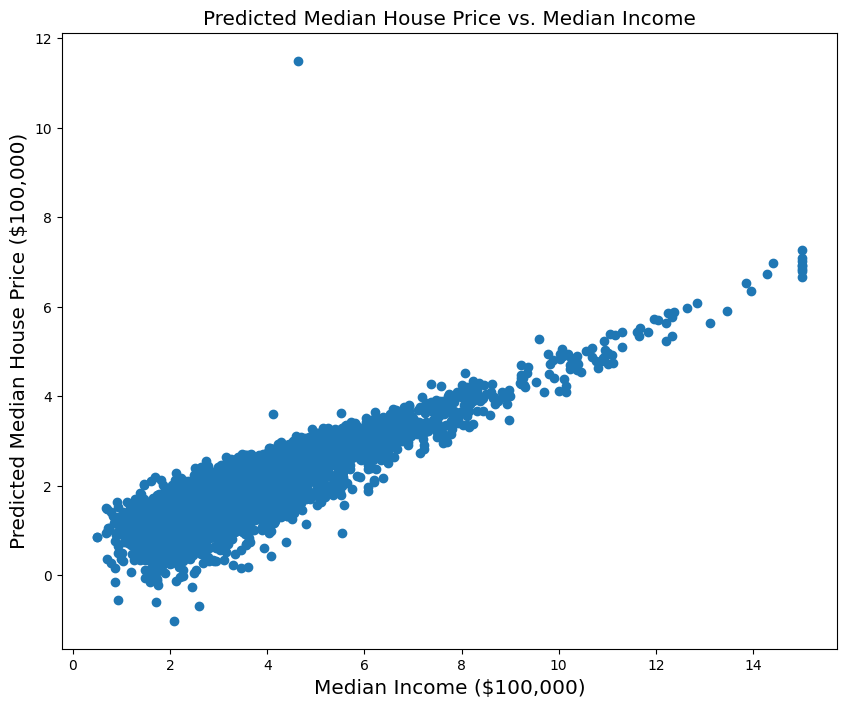

In [21]:
median_income = X_test["MedInc"]

plt.figure(figsize = (10, 8))
plt.scatter(median_income, predictions)

plt.title("Predicted Median House Price vs. Median Income", fontsize = 'x-large')
plt.xlabel("Median Income ($100,000)", fontsize = 'x-large')
plt.ylabel("Predicted Median House Price ($100,000)", fontsize = 'x-large')

plt.show()

##### **3.**

Plot these predictions versus the population feature (the `Population` column) in the test data to visualize the modeled relationship between these variables.

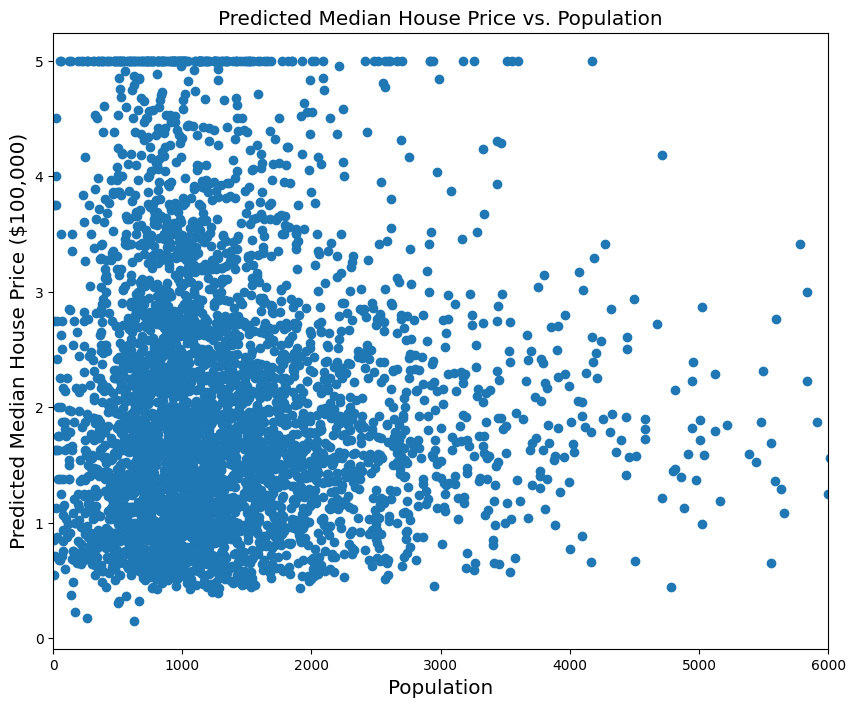

In [16]:
plt.figure(figsize = (10, 8))
plt.scatter(X_test["Population"], y_test)

plt.xlim(0, 6000)

plt.title("Predicted Median House Price vs. Population", fontsize = 'x-large')
plt.xlabel("Population", fontsize = 'x-large')
plt.ylabel("Predicted Median House Price ($100,000)", fontsize = 'x-large')

plt.show()

#### **Problem #3.3**

Now, let's dig deeper by looking at the coefficients produced by this model.


In [17]:
coefficients = pd.DataFrame([model.coef_], columns = X_test.columns)

print(coefficients)

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.448675  0.009724 -0.123323   0.783145   -0.000002 -0.003526 -0.419792   

   Longitude  
0  -0.433708  


#### **Reflection questions**

Based on these coefficients, answer the following questions:
* How do we predict the median cost of houses will change if the median income goes up by 1 (in units of $100,000)?
* How do we predict the median cost of houses will change if the population increases by 1?
* How do we predict the median cost of houses will change every decade that a house has been around?

<a name="p4"></a>

---
## **Part 4: [OPTIONAL] Evaluation with Residuals**
---

In this section, we will see how to implement evaluation metrics for linear regression, including how to check for homoscedasticity.


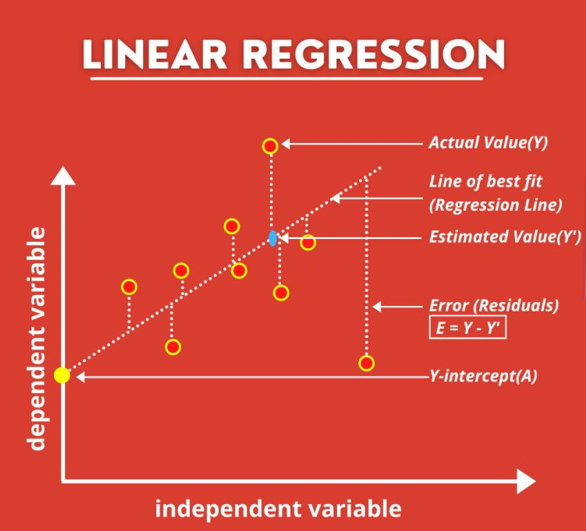

#### **Problem #4.1**

Before we can trust our evaluation metrics, we need to make sure that the residuals behave appropriately: randomly distributed around 0. If this is the case, we call the residuals **homoscedastic**. Although this sounds like a very fancy word all it means is that the residuals are considered normal. And checking for this is actually pretty straightforward!

**Together**, let's plot the residuals for each test point and confirm that they are randomly distributed around 0.

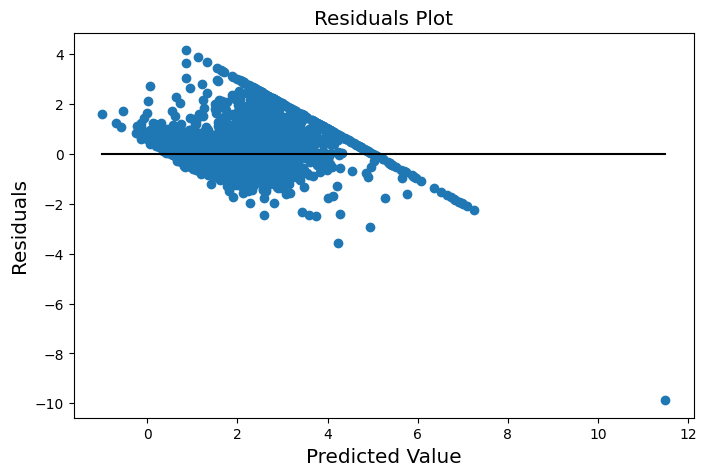

In [22]:
residuals = y_test - predictions

plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

#### **Problem #4.2**

Complete the code below to see the:

* $R^2$ score: A measure of how well a model “accounts for” the variability of the label.
* Mean squared error (MSE): A measure of “fit” using the sum squared of prediction error.

* Mean absolute error (MAE): A measure of “fit” using the absolute value of prediction error.


What do each of these numbers mean?

In [23]:
from sklearn.metrics import *

print("R-squared: " + str(r2_score(y_test, predictions)))
print("Mean Squared Error: " + str(mean_squared_error(y_test, predictions)))
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, predictions)))

R-squared: 0.5757877060324508
Mean Squared Error: 0.5558915986952444
Mean Absolute Error: 0.5332001304956553


#### **Problem #4.3**

Now, practice these steps by doing the following:

1. Create a new artifical dataset with `n_samples = 1000`, `n_features = 1`, `noise = 30`, and `random_state = 42`.

2. Train a Linear Regression model on this data and visualize the predictions vs. actual values on the test set.

3. Plot the residuals to check that they are homoscedastic (randomly distributed around 0).

4. Determine the $R^2$, MSE, and MAE.


##### **1.**

Create a new artifical dataset with `n_samples = 1000`, `n_features = 1`, `noise = 30`, and `random_state = 42`.

In [43]:
inputs, output = make_regression(n_samples = 1000, n_features = 1, noise = 30, random_state = 42)

##### **2.**

Train a Linear Regression model on this data and visualize the predictions vs. actual values on the test set.

In [44]:
# STEP 3: Split data
#====================
X_train, X_test, y_train, y_test = model_selection.train_test_split(inputs, output, test_size=0.2, random_state=42)


# STEP 4: Import model
#=====================
from sklearn.linear_model import  LinearRegression


# STEP 5: Initialize model
#=========================
model = LinearRegression()


# STEP 6: Fit model
#==================
model.fit(X_train, y_train)

LinearRegression()

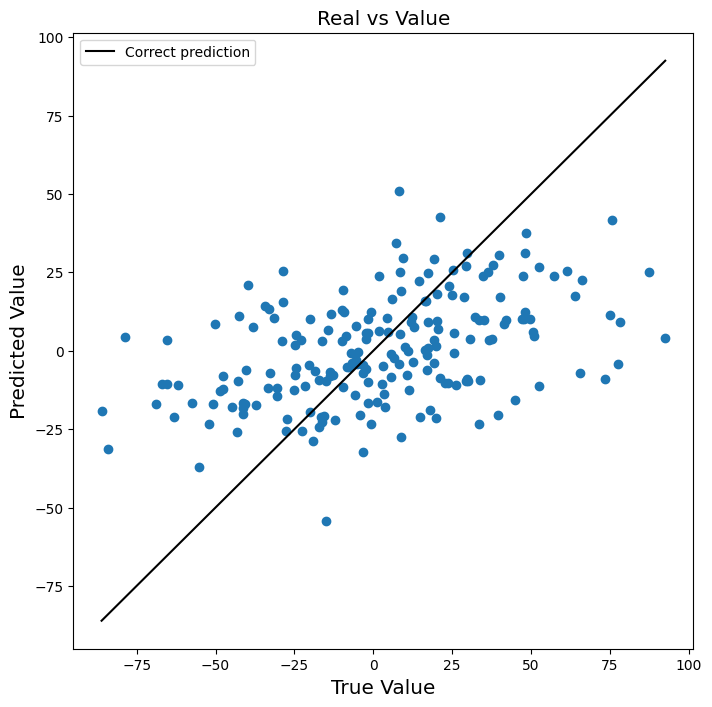

In [45]:
# Make Predictions on test set
predictions = model.predict(X_test)

# Visualize comparison of predictions vs. actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label="Correct prediction")


plt.xlabel('True Value', fontsize = 'x-large')
plt.ylabel('Predicted Value', fontsize = 'x-large')
plt.title("Real vs Value", fontsize = 'x-large')
plt.legend()

plt.show()

##### **3.**

Plot the residuals to check that they are homoscedastic (randomly distributed around 0).

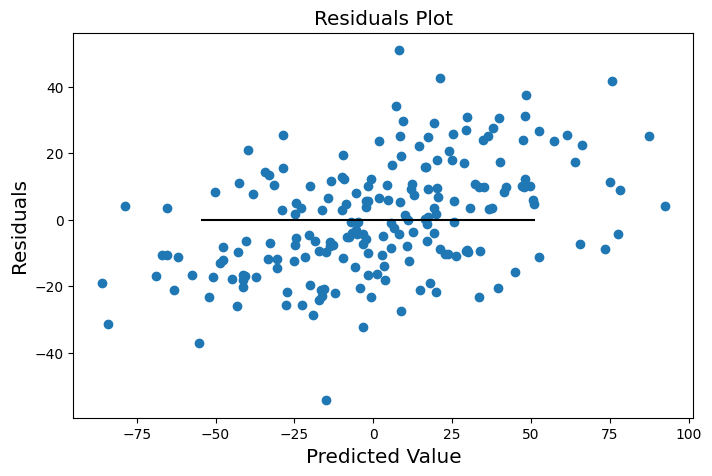

In [46]:
residuals = y_test - predictions

plt.figure(figsize = (8, 5))
plt.scatter(y_test, predictions)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

##### **4.**

Determine the  $𝑅^2$ , MSE, and MAE.

In [47]:
from sklearn.metrics import *

print("R-squared: " + str(r2_score(y_test, predictions)))
print("Mean Squared Error: " + str(mean_squared_error(y_test, predictions)))
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, predictions)))

R-squared: 0.20004460696632298
Mean Squared Error: 971.0992682924375
Mean Absolute Error: 24.514544843650864


Looking over your results, is this model's performance better, the same, or worse than the last model's performance? Why might this be?

---
#End of Notebook

© 2025 The Coding School, All rights reserved